In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime
import plotly.graph_objects as go



C:\Users\teres\AppData\Local\Temp\ipykernel_26640\2550304358.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


### Mi dataset de Kaggle

In [3]:
df_1= pd.read_csv("C:\\Users\\teres\\Desktop\\Bootcamp\\Carpeta_alumno\\carpeta_profesor\\2402_dsft_thebridge\\Entregas\\EDA\\smmh.csv")

fuente_1 = " social media- mental health,kaggle"

#### Hipótesis

* Ver qué relación hay entre la cantidad de horas empleadas en el uso de RRSS y el riesgo de sufrir enfermedades mentales
* Ver qué relación hay entre la cantidad de horas empleadas en el uso de RRSS y el mal uso de estas ( Preguntas de la 9-17)
* Ver qué diferencias hay por género en el uso de RRSS y el riesgo de sufrir enfermedades mentales
* Ver qué diferencias hay por grupos de edad en el uso de RRSS y el riesgo de sufrir enfermedades mentales

1. He formulado mis hipótesis en base a diferentes agrupaciones de datos en mi dataset:
    el riesgo de sufrir enfermedades mentales lo deduzco de las ultimas 3 columnas del dataset que incluyen preguntas sobre sintomatología depresiva.
    el mal uso de redes sociales lo he definido por las preguntas desde la 9 a la 17 
    

In [4]:
pd.set_option("display.max_columns", None)

In [5]:
df_1.head(20)

,Timestamp,1. What is your age?,2. Gender,3. Relationship Status,4. Occupation Status,5. What type of organizations are you affiliated with?,6. Do you use social media?,7. What social media platforms do you commonly use?,8. What is the average time you spend on social media every day?,9. How often do you find yourself using Social media without a specific purpose?,10. How often do you get distracted by Social media when you are busy doing something?,11. Do you feel restless if you haven't used Social media in a while?,"12. On a scale of 1 to 5, how easily distracted are you?","13. On a scale of 1 to 5, how much are you bothered by worries?",14. Do you find it difficult to concentrate on things?,"15. On a scale of 1-5, how often do you compare yourself to other successful people through the use of social media?","16. Following the previous question, how do you feel about these comparisons, generally speaking?",17. How often do you look to seek validation from features of social media?,18. How often do you feel depressed or down?,"19. On a scale of 1 to 5, how frequently does your interest in daily activities fluctuate?","20. On a scale of 1 to 5, how often do you face issues regarding sleep?"
0,4/18/2022 19:18:47,21.0,Male,In a relationship,University Student,University,Yes,"Facebook, Twitter, Instagram, YouTube, Discord...",Between 2 and 3 hours,5,3,2,5,2,5,2,3,2,5,4,5
1,4/18/2022 19:19:28,21.0,Female,Single,University Student,University,Yes,"Facebook, Twitter, Instagram, YouTube, Discord...",More than 5 hours,4,3,2,4,5,4,5,1,1,5,4,5
2,4/18/2022 19:25:59,21.0,Female,Single,University Student,University,Yes,"Facebook, Instagram, YouTube, Pinterest",Between 3 and 4 hours,3,2,1,2,5,4,3,3,1,4,2,5
3,4/18/2022 19:29:43,21.0,Female,Single,University Student,University,Yes,"Facebook, Instagram",More than 5 hours,4,2,1,3,5,3,5,1,2,4,3,2
4,4/18/2022 19:33:31,21.0,Female,Single,University Student,University,Yes,"Facebook, Instagram, YouTube",Between 2 and 3 hours,3,5,4,4,5,5,3,3,3,4,4,1
5,4/18/2022 19:33:48,22.0,Female,Single,University Student,University,Yes,"Facebook, Twitter, Instagram, YouTube, Discord...",Between 2 and 3 hours,4,4,2,3,4,3,4,4,3,3,2,4
6,4/18/2022 19:36:12,21.0,Female,Married,University Student,University,Yes,"Facebook, Instagram, YouTube, Snapchat, TikTok",Between 3 and 4 hours,4,3,2,2,4,3,5,3,4,5,5,3
7,4/18/2022 19:36:17,21.0,Female,In a relationship,University Student,University,Yes,"Facebook, Instagram, YouTube",More than 5 hours,5,2,3,3,3,1,1,3,1,5,5,1
8,4/18/2022 19:39:36,21.0,Female,In a relationship,University Student,University,Yes,"Facebook, Instagram, YouTube",More than 5 hours,5,2,3,3,1,1,1,3,1,5,5,1
9,4/18/2022 19:41:34,20.0,Male,Single,University Student,University,No,"Reddit, Pinterest",Less than an Hour,1,1,1,1,1,1,1,1,1,1,1,1


In [6]:
df_1.tail()

,Timestamp,1. What is your age?,2. Gender,3. Relationship Status,4. Occupation Status,5. What type of organizations are you affiliated with?,6. Do you use social media?,7. What social media platforms do you commonly use?,8. What is the average time you spend on social media every day?,9. How often do you find yourself using Social media without a specific purpose?,10. How often do you get distracted by Social media when you are busy doing something?,11. Do you feel restless if you haven't used Social media in a while?,"12. On a scale of 1 to 5, how easily distracted are you?","13. On a scale of 1 to 5, how much are you bothered by worries?",14. Do you find it difficult to concentrate on things?,"15. On a scale of 1-5, how often do you compare yourself to other successful people through the use of social media?","16. Following the previous question, how do you feel about these comparisons, generally speaking?",17. How often do you look to seek validation from features of social media?,18. How often do you feel depressed or down?,"19. On a scale of 1 to 5, how frequently does your interest in daily activities fluctuate?","20. On a scale of 1 to 5, how often do you face issues regarding sleep?"
476,5/21/2022 23:38:28,24.0,Male,Single,Salaried Worker,"University, Private",Yes,"Facebook, Instagram, YouTube",Between 2 and 3 hours,3,4,3,4,3,4,4,2,4,3,4,4
477,5/22/2022 0:01:05,26.0,Female,Married,Salaried Worker,University,Yes,"Facebook, YouTube",Between 1 and 2 hours,2,1,2,3,4,4,4,2,4,4,4,1
478,5/22/2022 10:29:21,29.0,Female,Married,Salaried Worker,University,Yes,"Facebook, YouTube",Between 2 and 3 hours,3,3,4,3,2,3,3,3,4,2,2,2
479,7/14/2022 19:33:47,21.0,Male,Single,University Student,University,Yes,"Facebook, Twitter, Instagram, YouTube, Discord...",Between 2 and 3 hours,2,3,2,3,3,2,2,3,4,4,5,4
480,11/12/2022 13:16:50,53.0,Male,Married,Salaried Worker,Private,Yes,"Facebook, YouTube",Less than an Hour,2,3,1,3,1,1,3,3,2,2,2,3


In [7]:
df_1["Timestamp"]

0       4/18/2022 19:18:47
1       4/18/2022 19:19:28
2       4/18/2022 19:25:59
3       4/18/2022 19:29:43
4       4/18/2022 19:33:31
              ...         
476     5/21/2022 23:38:28
477      5/22/2022 0:01:05
478     5/22/2022 10:29:21
479     7/14/2022 19:33:47
480    11/12/2022 13:16:50
Name: Timestamp, Length: 481, dtype: object

In [8]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 481 entries, 0 to 480
Data columns (total 21 columns):
 #   Column                                                                                                                Non-Null Count  Dtype  
---  ------                                                                                                                --------------  -----  
 0   Timestamp                                                                                                             481 non-null    object 
 1   1. What is your age?                                                                                                  481 non-null    float64
 2   2. Gender                                                                                                             481 non-null    object 
 3   3. Relationship Status                                                                                                481 non-null    object 
 4   4. Occup

In [9]:
df_1

,Timestamp,1. What is your age?,2. Gender,3. Relationship Status,4. Occupation Status,5. What type of organizations are you affiliated with?,6. Do you use social media?,7. What social media platforms do you commonly use?,8. What is the average time you spend on social media every day?,9. How often do you find yourself using Social media without a specific purpose?,10. How often do you get distracted by Social media when you are busy doing something?,11. Do you feel restless if you haven't used Social media in a while?,"12. On a scale of 1 to 5, how easily distracted are you?","13. On a scale of 1 to 5, how much are you bothered by worries?",14. Do you find it difficult to concentrate on things?,"15. On a scale of 1-5, how often do you compare yourself to other successful people through the use of social media?","16. Following the previous question, how do you feel about these comparisons, generally speaking?",17. How often do you look to seek validation from features of social media?,18. How often do you feel depressed or down?,"19. On a scale of 1 to 5, how frequently does your interest in daily activities fluctuate?","20. On a scale of 1 to 5, how often do you face issues regarding sleep?"
0,4/18/2022 19:18:47,21.0,Male,In a relationship,University Student,University,Yes,"Facebook, Twitter, Instagram, YouTube, Discord...",Between 2 and 3 hours,5,3,2,5,2,5,2,3,2,5,4,5
1,4/18/2022 19:19:28,21.0,Female,Single,University Student,University,Yes,"Facebook, Twitter, Instagram, YouTube, Discord...",More than 5 hours,4,3,2,4,5,4,5,1,1,5,4,5
2,4/18/2022 19:25:59,21.0,Female,Single,University Student,University,Yes,"Facebook, Instagram, YouTube, Pinterest",Between 3 and 4 hours,3,2,1,2,5,4,3,3,1,4,2,5
3,4/18/2022 19:29:43,21.0,Female,Single,University Student,University,Yes,"Facebook, Instagram",More than 5 hours,4,2,1,3,5,3,5,1,2,4,3,2
4,4/18/2022 19:33:31,21.0,Female,Single,University Student,University,Yes,"Facebook, Instagram, YouTube",Between 2 and 3 hours,3,5,4,4,5,5,3,3,3,4,4,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
476,5/21/2022 23:38:28,24.0,Male,Single,Salaried Worker,"University, Private",Yes,"Facebook, Instagram, YouTube",Between 2 and 3 hours,3,4,3,4,3,4,4,2,4,3,4,4
477,5/22/2022 0:01:05,26.0,Female,Married,Salaried Worker,University,Yes,"Facebook, YouTube",Between 1 and 2 hours,2,1,2,3,4,4,4,2,4,4,4,1
478,5/22/2022 10:29:21,29.0,Female,Married,Salaried Worker,University,Yes,"Facebook, YouTube",Between 2 and 3 hours,3,3,4,3,2,3,3,3,4,2,2,2
479,7/14/2022 19:33:47,21.0,Male,Single,University Student,University,Yes,"Facebook, Twitter, Instagram, YouTube, Discord...",Between 2 and 3 hours,2,3,2,3,3,2,2,3,4,4,5,4


In [10]:
df_1_esp = df_1.rename(columns = {"1. What is your age?": "Edad",
                       "2. Gender": "Género",
                       "3. Relationship Status": "Estatus relacional",
                       "4. Occupation Status": "Ocupación",
                       "5. What type of organizations are you affiliated with?": "Afiliación",
                       "6. Do you use social media?" : "RS_uso" ,
                       "7. What social media platforms do you commonly use?": "RS_tipo",
                       "8. What is the average time you spend on social media every day?": "RS_tiempo_medio",
                       "9. How often do you find yourself using Social media without a specific purpose?": "TDAH_1",
                       "10. How often do you get distracted by Social media when you are busy doing something?": "TDAH_2",
                       "11. Do you feel restless if you haven't used Social media in a while?": "Ansiedad_1",
                       "12. On a scale of 1 to 5, how easily distracted are you?": "TDAH_3",
                       "13. On a scale of 1 to 5, how much are you bothered by worries?" :"Ansiedad_2",
                       "14. Do you find it difficult to concentrate on things?":"TDAH_4",
                       "15. On a scale of 1-5, how often do you compare yourself to other successful people through the use of social media?":"Autoestima_1",
                       "16. Following the previous question, how do you feel about these comparisons, generally speaking?": "Autoestima_2",
                       "17. How often do you look to seek validation from features of social media?": "Autoestima_3",
                       "18. How often do you feel depressed or down?": "Depresion_1",
                       "19. On a scale of 1 to 5, how frequently does your interest in daily activities fluctuate?": "Depresion_2",
                       "20. On a scale of 1 to 5, how often do you face issues regarding sleep?" : "Depresion_3"})



                         

In [11]:
df_1_esp["Timestamp"]=pd.to_datetime(df_1_esp["Timestamp"])
#df['date'] = pd.to_datetime(df['date']) 

In [12]:
df_1_esp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 481 entries, 0 to 480
Data columns (total 21 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Timestamp           481 non-null    datetime64[ns]
 1   Edad                481 non-null    float64       
 2   Género              481 non-null    object        
 3   Estatus relacional  481 non-null    object        
 4   Ocupación           481 non-null    object        
 5   Afiliación          451 non-null    object        
 6   RS_uso              481 non-null    object        
 7   RS_tipo             481 non-null    object        
 8   RS_tiempo_medio     481 non-null    object        
 9   TDAH_1              481 non-null    int64         
 10  TDAH_2              481 non-null    int64         
 11  Ansiedad_1          481 non-null    int64         
 12  TDAH_3              481 non-null    int64         
 13  Ansiedad_2          481 non-null    int64         

In [13]:
df_1_esp = df_1_esp.loc[:, ["Timestamp", "Edad","Género" ,"Estatus relacional","Ocupación" ,"Afiliación" ,"RS_uso" ,"RS_tipo" ,"RS_tiempo_medio" ,"TDAH_1" ,"TDAH_2" ,"TDAH_3" , "TDAH_4", "Ansiedad_1" ,"Ansiedad_2","Autoestima_1" ,"Autoestima_2" ,"Autoestima_3","Depresion_1","Depresion_2","Depresion_3"]]

In [14]:
df_1_esp

,Timestamp,Edad,Género,Estatus relacional,Ocupación,Afiliación,RS_uso,RS_tipo,RS_tiempo_medio,TDAH_1,TDAH_2,TDAH_3,TDAH_4,Ansiedad_1,Ansiedad_2,Autoestima_1,Autoestima_2,Autoestima_3,Depresion_1,Depresion_2,Depresion_3
0,2022-04-18 19:18:47,21.0,Male,In a relationship,University Student,University,Yes,"Facebook, Twitter, Instagram, YouTube, Discord...",Between 2 and 3 hours,5,3,5,5,2,2,2,3,2,5,4,5
1,2022-04-18 19:19:28,21.0,Female,Single,University Student,University,Yes,"Facebook, Twitter, Instagram, YouTube, Discord...",More than 5 hours,4,3,4,4,2,5,5,1,1,5,4,5
2,2022-04-18 19:25:59,21.0,Female,Single,University Student,University,Yes,"Facebook, Instagram, YouTube, Pinterest",Between 3 and 4 hours,3,2,2,4,1,5,3,3,1,4,2,5
3,2022-04-18 19:29:43,21.0,Female,Single,University Student,University,Yes,"Facebook, Instagram",More than 5 hours,4,2,3,3,1,5,5,1,2,4,3,2
4,2022-04-18 19:33:31,21.0,Female,Single,University Student,University,Yes,"Facebook, Instagram, YouTube",Between 2 and 3 hours,3,5,4,5,4,5,3,3,3,4,4,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
476,2022-05-21 23:38:28,24.0,Male,Single,Salaried Worker,"University, Private",Yes,"Facebook, Instagram, YouTube",Between 2 and 3 hours,3,4,4,4,3,3,4,2,4,3,4,4
477,2022-05-22 00:01:05,26.0,Female,Married,Salaried Worker,University,Yes,"Facebook, YouTube",Between 1 and 2 hours,2,1,3,4,2,4,4,2,4,4,4,1
478,2022-05-22 10:29:21,29.0,Female,Married,Salaried Worker,University,Yes,"Facebook, YouTube",Between 2 and 3 hours,3,3,3,3,4,2,3,3,4,2,2,2
479,2022-07-14 19:33:47,21.0,Male,Single,University Student,University,Yes,"Facebook, Twitter, Instagram, YouTube, Discord...",Between 2 and 3 hours,2,3,3,2,2,3,2,3,4,4,5,4


In [16]:
### Como hay varias categorias dentro de género quiero agrupar todas las que no son hombre o mujer en Other    ESTO LO PRIMERO!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!

for i,  x in enumerate(df_1_esp["Género"]):
    if (x != "Female") and (x != "Male"):
        df_1_esp.loc[i,"Género"] = "Other"
        
    
df_1_esp["Género"].unique()

array(['Male', 'Female', 'Other'], dtype=object)

In [17]:
df_1_esp["Género"].unique()

array(['Male', 'Female', 'Other'], dtype=object)

In [18]:
n_hombres=len(df_1_esp[df_1_esp["Género"]=="Male"])
n_mujeres=len(df_1_esp[df_1_esp["Género"]=="Female"])
n_other= len(df_1_esp[df_1_esp["Género"]=="Other"])

print(n_hombres)
print(n_mujeres)
print(n_other)

211
263
7


In [19]:
df_1_esp[df_1_esp["Género"]== "Other"]

,Timestamp,Edad,Género,Estatus relacional,Ocupación,Afiliación,RS_uso,RS_tipo,RS_tiempo_medio,TDAH_1,TDAH_2,TDAH_3,TDAH_4,Ansiedad_1,Ansiedad_2,Autoestima_1,Autoestima_2,Autoestima_3,Depresion_1,Depresion_2,Depresion_3
35,2022-04-18 20:55:44,21.0,Other,Single,University Student,University,Yes,"Facebook, Twitter, Instagram, YouTube, Discord",More than 5 hours,3,4,4,5,5,4,1,3,1,4,2,1
67,2022-04-19 00:10:02,18.0,Other,Single,School Student,School,Yes,"Twitter, Instagram, YouTube, Reddit, TikTok",Between 2 and 3 hours,2,1,3,3,2,5,2,3,2,4,2,4
85,2022-04-19 07:10:09,24.0,Other,Single,Salaried Worker,NaN,Yes,"YouTube, Reddit",Between 2 and 3 hours,4,3,3,2,2,5,3,2,2,4,3,1
93,2022-04-19 10:24:04,17.0,Other,Single,School Student,School,Yes,"Twitter, Instagram, YouTube, Snapchat, Discord...",Between 4 and 5 hours,4,4,4,4,3,2,3,2,2,3,3,5
238,2022-04-26 23:02:27,69.0,Other,Divorced,Salaried Worker,NaN,Yes,TikTok,More than 5 hours,5,5,5,5,5,5,5,5,5,5,5,5
325,2022-05-11 22:33:14,21.0,Other,Single,University Student,University,Yes,"Facebook, Instagram, YouTube, Snapchat, Reddit...",More than 5 hours,4,2,5,4,3,5,4,3,5,5,5,1
368,2022-05-12 00:49:37,22.0,Other,In a relationship,Salaried Worker,Company,Yes,"Facebook, Instagram, YouTube, Snapchat",More than 5 hours,4,5,5,3,5,1,3,4,2,1,2,1


In [20]:
## convertir la columna de edad en entero
df_1_esp['Edad'] = df_1_esp['Edad'].astype('int64')


In [21]:
df_1_esp["Estatus relacional"].unique()

array(['In a relationship', 'Single', 'Married', 'Divorced'], dtype=object)

In [22]:
df_1_esp["Ocupación"].unique()

array(['University Student', 'School Student', 'Salaried Worker',
       'Retired'], dtype=object)

In [23]:
df_1_esp["Afiliación"].unique() ### no le voy a dar mucha importancia a lo mejor me la cargo luego

array(['University', 'Private', nan, 'School, University', 'Company',
       'School, Private', 'University, Company', 'Goverment',
       'Company, Private', 'School', 'University, Goverment, Private',
       'University, Company, Private', 'University, Private',
       'University, N/A', 'School, University, Private',
       'University, Goverment', 'University, Company, Goverment',
       'School, Company', 'School, N/A'], dtype=object)

#### Compruebo qué pasa con los que dicen que no usan RRSS; vemos que sí que usan pero tiempos bajos

In [24]:
usan_RS = df_1_esp[df_1_esp["RS_uso"]== "Yes"]
len(usan_RS)

478

In [25]:
no_usan_RS = df_1_esp[df_1_esp["RS_uso"]== "No"] 
len(no_usan_RS)

3

In [26]:
no_usan_RS

,Timestamp,Edad,Género,Estatus relacional,Ocupación,Afiliación,RS_uso,RS_tipo,RS_tiempo_medio,TDAH_1,TDAH_2,TDAH_3,TDAH_4,Ansiedad_1,Ansiedad_2,Autoestima_1,Autoestima_2,Autoestima_3,Depresion_1,Depresion_2,Depresion_3
9,2022-04-18 19:41:34,20,Male,Single,University Student,University,No,"Reddit, Pinterest",Less than an Hour,1,1,1,1,1,1,1,1,1,1,1,1
54,2022-04-18 22:35:53,26,Male,In a relationship,Salaried Worker,Company,No,"YouTube, Discord, Reddit",Between 1 and 2 hours,4,1,2,1,1,2,1,3,1,1,3,2
134,2022-04-19 22:04:03,50,Male,Divorced,Salaried Worker,Private,No,"Instagram, YouTube",Between 1 and 2 hours,2,1,2,2,1,2,1,4,1,2,2,1


### Para comparar el tiempo en RS:

In [27]:
df_1_esp["RS_tiempo_medio"].unique()

array(['Between 2 and 3 hours', 'More than 5 hours',
       'Between 3 and 4 hours', 'Less than an Hour',
       'Between 1 and 2 hours', 'Between 4 and 5 hours'], dtype=object)

In [28]:
df_1_esp[(df_1_esp["RS_tiempo_medio"] =='Between 4 and 5 hours') |  (df_1_esp["RS_tiempo_medio"] =='More than 5 hours')].corr(numeric_only=True)

,Edad,TDAH_1,TDAH_2,TDAH_3,TDAH_4,Ansiedad_1,Ansiedad_2,Autoestima_1,Autoestima_2,Autoestima_3,Depresion_1,Depresion_2,Depresion_3
Edad,1.000000,0.154537,0.120811,0.009803,-0.019117,0.113291,0.012938,0.084808,0.192864,0.093485,0.021433,0.040412,0.053898
TDAH_1,0.154537,1.000000,0.240983,0.173917,0.118032,0.194033,0.074710,-0.065285,0.149495,0.041644,0.114929,0.225955,0.221361
TDAH_2,0.120811,0.240983,1.000000,0.555982,0.458798,0.387597,0.209330,0.159438,0.079906,0.164106,0.170658,0.269230,0.218869
TDAH_3,0.009803,0.173917,0.555982,1.000000,0.621966,0.448226,0.309162,0.257322,0.004997,0.186369,0.292137,0.421128,0.198785
TDAH_4,-0.019117,0.118032,0.458798,0.621966,1.000000,0.383426,0.404304,0.273847,0.037218,0.195978,0.392792,0.364371,0.239623
Ansiedad_1,0.113291,0.194033,0.387597,0.448226,0.383426,1.000000,0.244772,0.216027,0.243954,0.127987,0.220441,0.365132,0.019991
Ansiedad_2,0.012938,0.074710,0.209330,0.309162,0.404304,0.244772,1.000000,0.339129,-0.044791,0.238715,0.525644,0.343535,0.218866
Autoestima_1,0.084808,-0.065285,0.159438,0.257322,0.273847,0.216027,0.339129,1.000000,-0.130854,0.516128,0.312797,0.303703,0.153977
Autoestima_2,0.192864,0.149495,0.079906,0.004997,0.037218,0.243954,-0.044791,-0.130854,1.000000,0.143911,-0.062618,0.153853,0.091244
Autoestima_3,0.093485,0.041644,0.164106,0.186369,0.195978,0.127987,0.238715,0.516128,0.143911,1.000000,0.237226,0.254587,0.186898


#### Voy a establecer 3 datasets respecto a la cantidad de horas empleadas en redes sociales:

    * df_alto_uso : 4-5-+
    * df_medio_uso: 2-3
    * df_bajo_uso: 0-2


In [29]:
df_alto_uso = df_1_esp[(df_1_esp["RS_tiempo_medio"] =='Between 4 and 5 hours') |  (df_1_esp["RS_tiempo_medio"] =='More than 5 hours')]

##### Sumamos los valores de las preguntas de potencial uso nocivo de RRSS, (-  las de depresion) porque luego veremos si estan relacionadas con mayores valores de esas preguntas

In [30]:
### la media de todo el grupo
df_alto_uso[["TDAH_1","TDAH_2","TDAH_3","TDAH_4","Ansiedad_1","Ansiedad_2","Autoestima_1","Autoestima_2","Autoestima_3"]].sum(axis=1).mean()/9

3.384942319368549

In [31]:
## La media por usuario respecto a sus preguntas sobre el potencial uso nocivo que hacen de las RRSS y creamos una columna nueva
df_alto_uso["media_respuestas_uso"] = df_alto_uso[["TDAH_1","TDAH_2","TDAH_3","TDAH_4","Ansiedad_1","Ansiedad_2","Autoestima_1","Autoestima_2","Autoestima_3"]].sum(axis=1)/9

C:\Users\teres\AppData\Local\Temp\ipykernel_26640\1866829391.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_alto_uso["media_respuestas_uso"] = df_alto_uso[["TDAH_1","TDAH_2","TDAH_3","TDAH_4","Ansiedad_1","Ansiedad_2","Autoestima_1","Autoestima_2","Autoestima_3"]].sum(axis=1)/9


In [32]:
## La media por usuario respecto a sus preguntas(columna19-21) y creamos una columna nueva que evalua la media de riesgo de sufrir problemas mentales relacionados con depresión
df_alto_uso["media_respuestas_riesgo"] = df_alto_uso[["Depresion_1","Depresion_2","Depresion_3"]].sum(axis=1)/3

C:\Users\teres\AppData\Local\Temp\ipykernel_26640\3412114349.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_alto_uso["media_respuestas_riesgo"] = df_alto_uso[["Depresion_1","Depresion_2","Depresion_3"]].sum(axis=1)/3


In [33]:
df_alto_uso

,Timestamp,Edad,Género,Estatus relacional,Ocupación,Afiliación,RS_uso,RS_tipo,RS_tiempo_medio,TDAH_1,TDAH_2,TDAH_3,TDAH_4,Ansiedad_1,Ansiedad_2,Autoestima_1,Autoestima_2,Autoestima_3,Depresion_1,Depresion_2,Depresion_3,media_respuestas_uso,media_respuestas_riesgo
1,2022-04-18 19:19:28,21,Female,Single,University Student,University,Yes,"Facebook, Twitter, Instagram, YouTube, Discord...",More than 5 hours,4,3,4,4,2,5,5,1,1,5,4,5,3.222222,4.666667
3,2022-04-18 19:29:43,21,Female,Single,University Student,University,Yes,"Facebook, Instagram",More than 5 hours,4,2,3,3,1,5,5,1,2,4,3,2,2.888889,3.000000
7,2022-04-18 19:36:17,21,Female,In a relationship,University Student,University,Yes,"Facebook, Instagram, YouTube",More than 5 hours,5,2,3,1,3,3,1,3,1,5,5,1,2.444444,3.666667
8,2022-04-18 19:39:36,21,Female,In a relationship,University Student,University,Yes,"Facebook, Instagram, YouTube",More than 5 hours,5,2,3,1,3,1,1,3,1,5,5,1,2.222222,3.666667
14,2022-04-18 19:59:08,22,Male,Single,University Student,University,Yes,"Facebook, YouTube, Pinterest",More than 5 hours,5,5,5,5,5,5,5,5,5,5,5,5,5.000000,5.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
466,2022-05-14 13:40:14,23,Male,In a relationship,School Student,"University, Private",Yes,"Facebook, Instagram, YouTube, Discord",Between 4 and 5 hours,2,4,3,4,2,4,1,3,1,3,2,3,2.666667,2.666667
468,2022-05-14 17:33:37,18,Male,Single,School Student,"School, N/A",Yes,Pinterest,More than 5 hours,2,3,3,3,1,5,5,1,2,5,2,1,2.777778,2.666667
469,2022-05-14 17:33:57,15,Male,Single,School Student,School,Yes,"Instagram, YouTube, Discord, Reddit",Between 4 and 5 hours,1,1,3,3,1,3,3,3,3,1,1,1,2.333333,1.000000
471,2022-05-16 20:20:31,20,Female,Single,University Student,University,Yes,"Facebook, Instagram, YouTube",More than 5 hours,5,4,4,3,2,5,1,3,2,4,3,4,3.222222,3.666667


Estadisticos de media moda mediana por cada grupo grupo de alto uso

In [34]:
df_alto_uso["media_respuestas_riesgo"].describe()

count    183.000000
mean       3.526412
std        0.935203
min        1.000000
25%        3.000000
50%        3.666667
75%        4.333333
max        5.000000
Name: media_respuestas_riesgo, dtype: float64

In [35]:
### la media de nuestro grupo de alto uso respecto al riesgo de sufrir problemas mentales relacionados con la depresión
df_alto_uso["media_respuestas_riesgo"].mean()

3.526411657559198

In [36]:
df_alto_uso["media_respuestas_riesgo"].mode()

0    3.666667
Name: media_respuestas_riesgo, dtype: float64

In [37]:
df_alto_uso["media_respuestas_riesgo"].median()

3.6666666666666665

In [38]:
### la media de nuestro grupo de alto uso respecto al uso nocivo de RRSS
df_alto_uso["media_respuestas_uso"].mean()

3.384942319368548

In [39]:
df_alto_uso["media_respuestas_uso"].mode()

0    3.555556
Name: media_respuestas_uso, dtype: float64

In [40]:
df_alto_uso["media_respuestas_uso"].median()

3.4444444444444446

Aquí sólo quiero comprobar el rango máximo que sera esperable de 5 y el minimo de 2 y ver si hay alguna correlacion entre las preguntas en este grupo (es meramente informativo)

In [41]:
df_alto_uso[["TDAH_1","TDAH_2","TDAH_3","TDAH_4","Ansiedad_1","Ansiedad_2","Autoestima_1","Autoestima_2","Autoestima_3"]].sum(axis=1).max()/9

5.0

In [42]:
df_alto_uso[["TDAH_1","TDAH_2","TDAH_3","TDAH_4","Ansiedad_1","Ansiedad_2","Autoestima_1","Autoestima_2","Autoestima_3"]].sum(axis=1).min()/9

1.2222222222222223

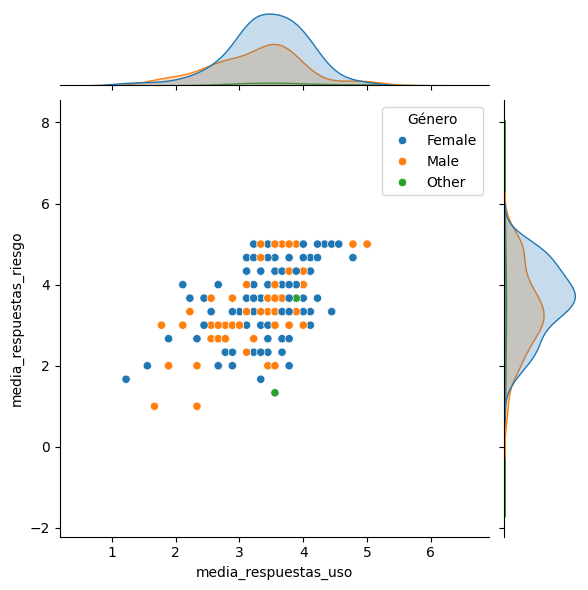

In [43]:
sns.jointplot(data = df_alto_uso, x = df_alto_uso["media_respuestas_uso"], y =df_alto_uso["media_respuestas_riesgo"],hue = "Género")

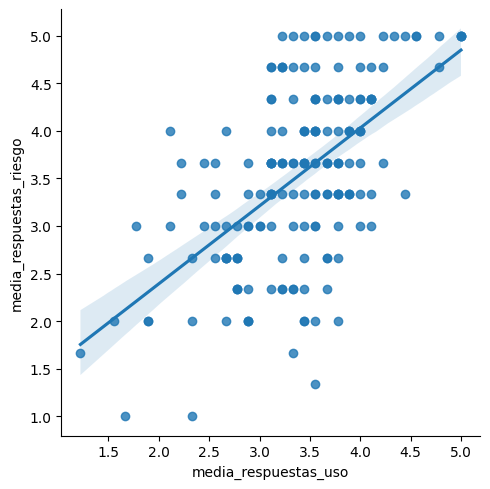

In [44]:
sns.lmplot( data = df_alto_uso, x = "media_respuestas_uso", y = "media_respuestas_riesgo", fit_reg = True )

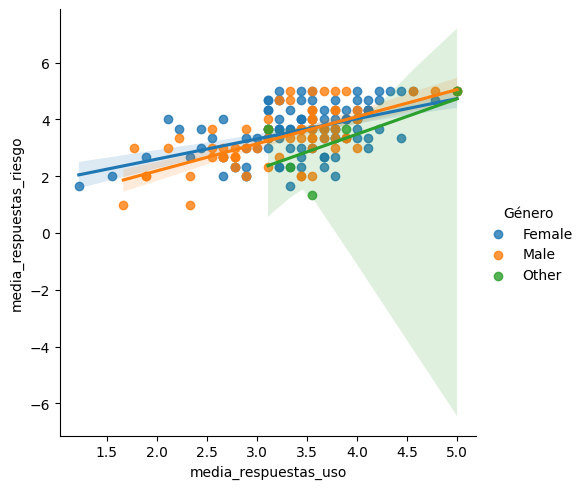

In [45]:
sns.lmplot( data = df_alto_uso, x = "media_respuestas_uso", y = "media_respuestas_riesgo", fit_reg = True,hue= "Género" )

Hacemos otro dataset similar con el uso medio de RRSS

In [46]:
df_uso_medio = df_1_esp[(df_1_esp["RS_tiempo_medio"] =='Between 2 and 3 hours') |  (df_1_esp["RS_tiempo_medio"] =='Between 3 and 4 hours')]

In [47]:
df_uso_medio.head()

,Timestamp,Edad,Género,Estatus relacional,Ocupación,Afiliación,RS_uso,RS_tipo,RS_tiempo_medio,TDAH_1,TDAH_2,TDAH_3,TDAH_4,Ansiedad_1,Ansiedad_2,Autoestima_1,Autoestima_2,Autoestima_3,Depresion_1,Depresion_2,Depresion_3
0,2022-04-18 19:18:47,21,Male,In a relationship,University Student,University,Yes,"Facebook, Twitter, Instagram, YouTube, Discord...",Between 2 and 3 hours,5,3,5,5,2,2,2,3,2,5,4,5
2,2022-04-18 19:25:59,21,Female,Single,University Student,University,Yes,"Facebook, Instagram, YouTube, Pinterest",Between 3 and 4 hours,3,2,2,4,1,5,3,3,1,4,2,5
4,2022-04-18 19:33:31,21,Female,Single,University Student,University,Yes,"Facebook, Instagram, YouTube",Between 2 and 3 hours,3,5,4,5,4,5,3,3,3,4,4,1
5,2022-04-18 19:33:48,22,Female,Single,University Student,University,Yes,"Facebook, Twitter, Instagram, YouTube, Discord...",Between 2 and 3 hours,4,4,3,3,2,4,4,4,3,3,2,4
6,2022-04-18 19:36:12,21,Female,Married,University Student,University,Yes,"Facebook, Instagram, YouTube, Snapchat, TikTok",Between 3 and 4 hours,4,3,2,3,2,4,5,3,4,5,5,3


In [48]:
df_uso_medio["media_respuestas_uso"] = df_uso_medio[["TDAH_1","TDAH_2","TDAH_3","TDAH_4","Ansiedad_1","Ansiedad_2","Autoestima_1","Autoestima_2","Autoestima_3"]].sum(axis=1)/9

C:\Users\teres\AppData\Local\Temp\ipykernel_26640\142126969.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_uso_medio["media_respuestas_uso"] = df_uso_medio[["TDAH_1","TDAH_2","TDAH_3","TDAH_4","Ansiedad_1","Ansiedad_2","Autoestima_1","Autoestima_2","Autoestima_3"]].sum(axis=1)/9


In [49]:
df_uso_medio["media_respuestas_riesgo"] = df_uso_medio[["Depresion_1","Depresion_2","Depresion_3"]].sum(axis=1)/3

C:\Users\teres\AppData\Local\Temp\ipykernel_26640\1193776907.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_uso_medio["media_respuestas_riesgo"] = df_uso_medio[["Depresion_1","Depresion_2","Depresion_3"]].sum(axis=1)/3


Miramos las medias del grupo como con el grupo anterior

In [50]:
df_uso_medio["media_respuestas_riesgo"].describe()

count    194.000000
mean       3.221649
std        0.983813
min        1.000000
25%        2.666667
50%        3.333333
75%        4.000000
max        5.000000
Name: media_respuestas_riesgo, dtype: float64

In [51]:
df_uso_medio["media_respuestas_riesgo"].mean()

3.2216494845360826

In [52]:
df_uso_medio["media_respuestas_riesgo"].mode()

0    3.000000
1    3.666667
Name: media_respuestas_riesgo, dtype: float64

In [53]:
df_uso_medio["media_respuestas_riesgo"].median()

3.3333333333333335

In [54]:
df_uso_medio["media_respuestas_uso"].mean()

3.1191294387170676

In [55]:
df_uso_medio["media_respuestas_uso"].mode()

0    2.777778
1    3.222222
Name: media_respuestas_uso, dtype: float64

In [56]:
df_uso_medio["media_respuestas_uso"].median()

3.2222222222222223

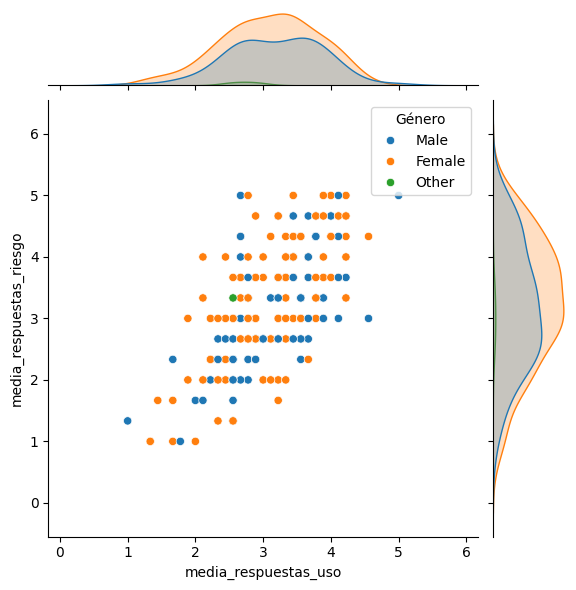

In [57]:
sns.jointplot(data = df_uso_medio, x = df_uso_medio["media_respuestas_uso"], y =df_uso_medio["media_respuestas_riesgo"],hue = "Género")

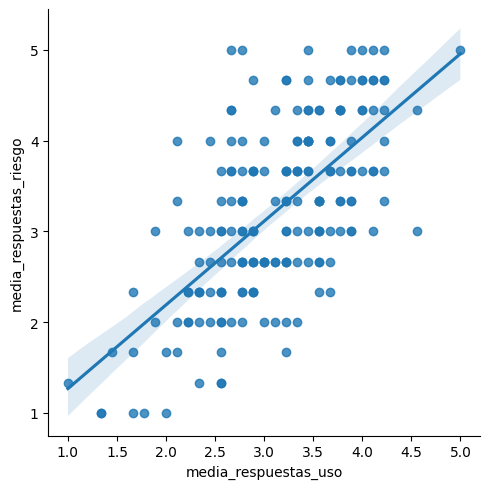

In [58]:
sns.lmplot( data = df_uso_medio, x = "media_respuestas_uso", y = "media_respuestas_riesgo", fit_reg = True );

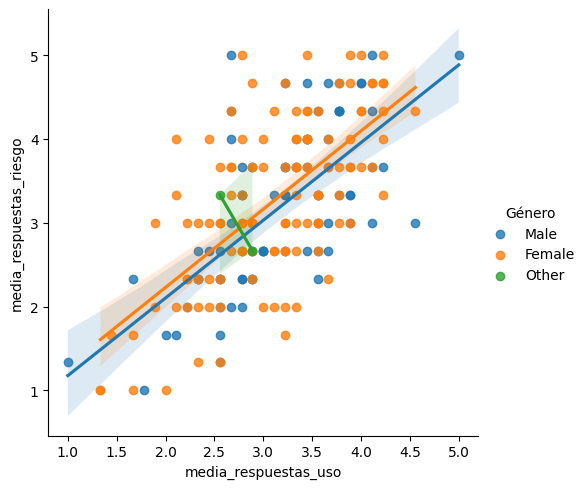

In [59]:
sns.lmplot( data = df_uso_medio, x = "media_respuestas_uso", y = "media_respuestas_riesgo", fit_reg = True ,hue = "Género")

In [60]:
df_bajo_uso = df_1_esp[(df_1_esp["RS_tiempo_medio"] =='Less than an Hour') |  (df_1_esp["RS_tiempo_medio"] =='Between 1 and 2 hours')]

In [61]:
df_bajo_uso.head()

,Timestamp,Edad,Género,Estatus relacional,Ocupación,Afiliación,RS_uso,RS_tipo,RS_tiempo_medio,TDAH_1,TDAH_2,TDAH_3,TDAH_4,Ansiedad_1,Ansiedad_2,Autoestima_1,Autoestima_2,Autoestima_3,Depresion_1,Depresion_2,Depresion_3
9,2022-04-18 19:41:34,20,Male,Single,University Student,University,No,"Reddit, Pinterest",Less than an Hour,1,1,1,1,1,1,1,1,1,1,1,1
15,2022-04-18 20:15:31,23,Male,In a relationship,University Student,Private,Yes,"Facebook, Instagram, YouTube, Reddit",Between 1 and 2 hours,3,4,3,4,2,4,3,2,2,3,4,2
16,2022-04-18 20:15:38,21,Male,Single,University Student,University,Yes,"Facebook, YouTube, Discord",Less than an Hour,2,2,2,2,1,4,1,3,1,4,1,3
18,2022-04-18 20:22:02,28,Male,Single,University Student,University,Yes,"Facebook, YouTube, Discord, Reddit",Between 1 and 2 hours,3,4,4,5,2,5,2,3,1,3,3,1
19,2022-04-18 20:28:03,34,Male,Divorced,Salaried Worker,Private,Yes,"Facebook, Twitter, Instagram, YouTube",Between 1 and 2 hours,2,4,3,1,3,4,1,5,3,2,2,2


In [62]:
df_bajo_uso["media_respuestas_uso"] = df_bajo_uso[["TDAH_1","TDAH_2","TDAH_3","TDAH_4","Ansiedad_1","Ansiedad_2","Autoestima_1","Autoestima_2","Autoestima_3"]].sum(axis=1)/9

C:\Users\teres\AppData\Local\Temp\ipykernel_26640\3659517817.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_bajo_uso["media_respuestas_uso"] = df_bajo_uso[["TDAH_1","TDAH_2","TDAH_3","TDAH_4","Ansiedad_1","Ansiedad_2","Autoestima_1","Autoestima_2","Autoestima_3"]].sum(axis=1)/9


In [63]:
df_bajo_uso["media_respuestas_riesgo"] = df_bajo_uso[["Depresion_1","Depresion_2","Depresion_3"]].sum(axis=1)/3

C:\Users\teres\AppData\Local\Temp\ipykernel_26640\2193583778.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_bajo_uso["media_respuestas_riesgo"] = df_bajo_uso[["Depresion_1","Depresion_2","Depresion_3"]].sum(axis=1)/3


In [64]:
df_bajo_uso["media_respuestas_riesgo"].describe()

count    104.000000
mean       2.628205
std        1.065602
min        1.000000
25%        1.916667
50%        2.666667
75%        3.333333
max        5.000000
Name: media_respuestas_riesgo, dtype: float64

In [65]:
df_bajo_uso["media_respuestas_riesgo"].mean()

2.6282051282051286

In [66]:
df_bajo_uso["media_respuestas_riesgo"].mode()

0    2.333333
1    2.666667
2    3.000000
Name: media_respuestas_riesgo, dtype: float64

In [67]:
df_bajo_uso["media_respuestas_riesgo"].median()

2.6666666666666665

In [68]:
df_bajo_uso["media_respuestas_uso"].mean()

2.4487179487179485

In [69]:
df_bajo_uso["media_respuestas_uso"].mode()

0    2.777778
Name: media_respuestas_uso, dtype: float64

In [70]:
df_bajo_uso["media_respuestas_uso"].median()

2.5

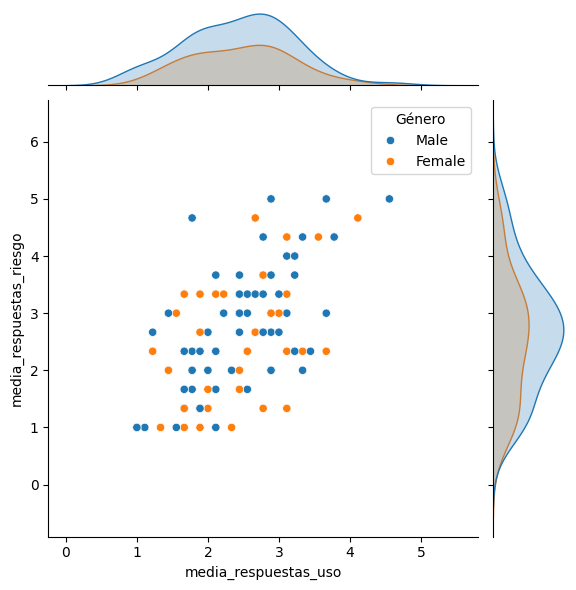

In [71]:
sns.jointplot(data = df_bajo_uso, x = df_bajo_uso["media_respuestas_uso"], y =df_bajo_uso["media_respuestas_riesgo"], hue = "Género")

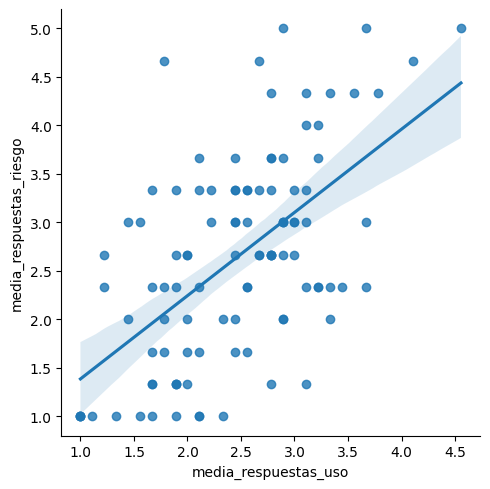

In [72]:
sns.lmplot( data = df_bajo_uso, x = "media_respuestas_uso", y = "media_respuestas_riesgo", fit_reg = True )

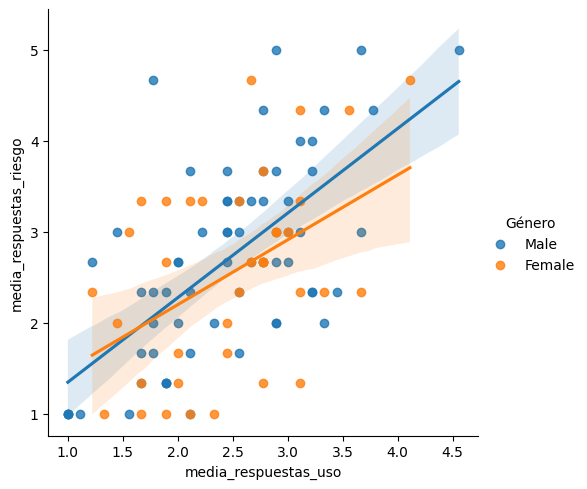

In [73]:
sns.lmplot( data = df_bajo_uso, x = "media_respuestas_uso", y = "media_respuestas_riesgo", fit_reg = True, hue = "Género" )

### Usos de RRSS por género


In [74]:
df_alto_uso.head()

,Timestamp,Edad,Género,Estatus relacional,Ocupación,Afiliación,RS_uso,RS_tipo,RS_tiempo_medio,TDAH_1,TDAH_2,TDAH_3,TDAH_4,Ansiedad_1,Ansiedad_2,Autoestima_1,Autoestima_2,Autoestima_3,Depresion_1,Depresion_2,Depresion_3,media_respuestas_uso,media_respuestas_riesgo
1,2022-04-18 19:19:28,21,Female,Single,University Student,University,Yes,"Facebook, Twitter, Instagram, YouTube, Discord...",More than 5 hours,4,3,4,4,2,5,5,1,1,5,4,5,3.222222,4.666667
3,2022-04-18 19:29:43,21,Female,Single,University Student,University,Yes,"Facebook, Instagram",More than 5 hours,4,2,3,3,1,5,5,1,2,4,3,2,2.888889,3.000000
7,2022-04-18 19:36:17,21,Female,In a relationship,University Student,University,Yes,"Facebook, Instagram, YouTube",More than 5 hours,5,2,3,1,3,3,1,3,1,5,5,1,2.444444,3.666667
8,2022-04-18 19:39:36,21,Female,In a relationship,University Student,University,Yes,"Facebook, Instagram, YouTube",More than 5 hours,5,2,3,1,3,1,1,3,1,5,5,1,2.222222,3.666667
14,2022-04-18 19:59:08,22,Male,Single,University Student,University,Yes,"Facebook, YouTube, Pinterest",More than 5 hours,5,5,5,5,5,5,5,5,5,5,5,5,5.000000,5.000000


In [75]:
print(n_mujeres)
print(n_hombres)
print(n_other)

263
211
7


In [76]:

muj_alto_uso_porcentaje=len(df_alto_uso[df_alto_uso["Género"]== "Female"])/n_mujeres
print(muj_alto_uso_porcentaje)
hom_alto_uso_porcentaje= len(df_alto_uso[df_alto_uso["Género"]=="Male"])/n_hombres
print(hom_alto_uso_porcentaje)
oth_alto_uso_porcentaje=len(df_alto_uso[df_alto_uso["Género"]== "Other"])/n_other
print(oth_alto_uso_porcentaje)

0.4220532319391635
0.3175355450236967
0.7142857142857143


In [77]:
muj_uso_medio_porcentaje=len(df_uso_medio[df_uso_medio["Género"]== "Female"])/n_mujeres
print(muj_uso_medio_porcentaje)
hom_uso_medio_porcentaje=len(df_uso_medio[df_uso_medio["Género"]== "Male"])/n_hombres
print(hom_uso_medio_porcentaje)
oth_uso_medio_porcentaje=len(df_uso_medio[df_uso_medio["Género"]== "Other"])/n_other
print(oth_uso_medio_porcentaje)

0.4372623574144487
0.36492890995260663
0.2857142857142857


In [78]:
muj_bajo_uso_porcentaje = (len(df_bajo_uso[df_bajo_uso["Género"]== "Female"])/n_mujeres)
print(muj_bajo_uso_porcentaje )
hom_bajo_uso_porcentaje = len(df_bajo_uso[df_bajo_uso["Género"]== "Male"])/n_hombres
print(hom_bajo_uso_porcentaje)
oth_bajo_uso_porcentaje = len(df_bajo_uso[df_bajo_uso["Género"]== "Other"])/n_other
print(oth_bajo_uso_porcentaje)

0.14068441064638784
0.3175355450236967
0.0


In [79]:
porcentajes_uso= {"%_uso_alto" : [ muj_alto_uso_porcentaje, hom_alto_uso_porcentaje, oth_alto_uso_porcentaje ],
                 "%_uso_medio": [ muj_uso_medio_porcentaje, hom_uso_medio_porcentaje, oth_uso_medio_porcentaje ],
                 "%_uso_bajo": [ muj_bajo_uso_porcentaje, hom_bajo_uso_porcentaje, oth_bajo_uso_porcentaje ]}
indices= ["Mujeres","Hombres","Otros"]
columnas= ["%_uso_alto","%_uso_medio","%_uso_bajo"]

porcentajes_uso_genero= pd.DataFrame ( data = porcentajes_uso, index = indices, columns = columnas )
porcentajes_uso_genero



,%_uso_alto,%_uso_medio,%_uso_bajo
Mujeres,0.422053,0.437262,0.140684
Hombres,0.317536,0.364929,0.317536
Otros,0.714286,0.285714,0.000000


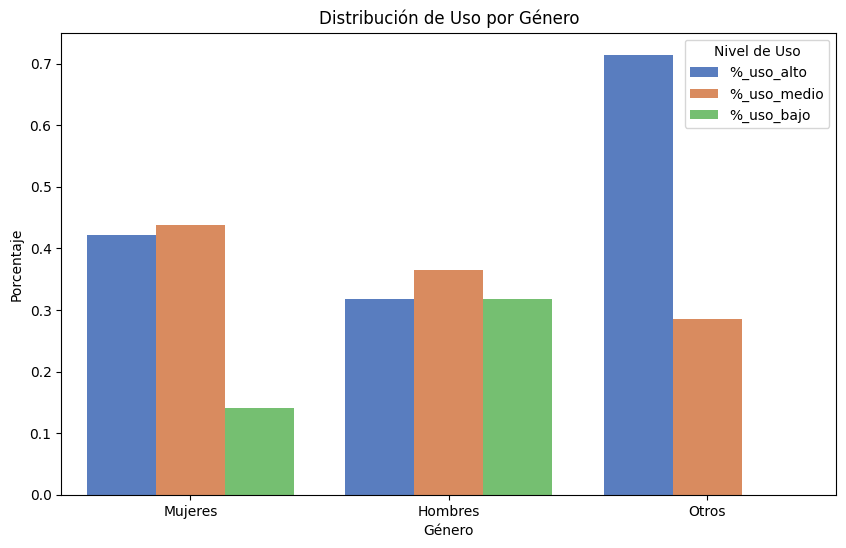

In [80]:
porcentajes_uso_genero_melted = porcentajes_uso_genero.reset_index().melt(id_vars="index", var_name="Nivel de Uso", value_name="Porcentaje")
porcentajes_uso_genero_melted.columns = ["Género", "Nivel de Uso", "Porcentaje"]

# Create the grouped bar plot using Seaborn
plt.figure(figsize=(10, 6))
sns.barplot(data=porcentajes_uso_genero_melted, x="Género", y="Porcentaje", hue="Nivel de Uso", palette="muted")
plt.title("Distribución de Uso por Género")
plt.ylabel("Porcentaje")
plt.xlabel("Género")
plt.legend(title="Nivel de Uso")
plt.show()

In [81]:
df_1_esp["Grupos_edad"] = 0

df_1_esp.loc[df_1_esp["Edad"]<= 18, "Grupos_edad"] = "menores 18 años"

df_1_esp.loc[(df_1_esp["Edad"]> 18) & (df_1_esp["Edad"]<= 25), "Grupos_edad"] = "Jóvenes de 19-25"

df_1_esp.loc[(df_1_esp["Edad"]> 25) & (df_1_esp["Edad"]<= 35), "Grupos_edad"] = "Jóvenes de 26-35"

df_1_esp.loc[(df_1_esp["Edad"]> 35) & (df_1_esp["Edad"]<= 50), "Grupos_edad"] = "Adultos de 36-50"

df_1_esp.loc[(df_1_esp["Edad"]> 50), "Grupos_edad"] = "Adultos > 50"





C:\Users\teres\AppData\Local\Temp\ipykernel_26640\249174400.py:3: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'menores 18 años' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df_1_esp.loc[df_1_esp["Edad"]<= 18, "Grupos_edad"] = "menores 18 años"


In [82]:
df_1_esp["Grupos_edad"].unique()

array(['Jóvenes de 19-25', 'Jóvenes de 26-35', 'menores 18 años',
       'Adultos > 50', 'Adultos de 36-50'], dtype=object)

In [83]:
niños = df_1_esp[df_1_esp["Edad"]< 18]
print(len(df_1_esp[df_1_esp["Edad"]< 18]))

jovenes_1 = df_1_esp[(df_1_esp["Edad"]>= 18) & (df_1_esp["Edad"] <= 25 )]
print(len(df_1_esp[(df_1_esp["Edad"]>= 18) & (df_1_esp["Edad"] <= 25 )]))

jovenes_2 = df_1_esp[(df_1_esp["Edad"]>= 25) & (df_1_esp["Edad"] <= 35 )]
print(len(df_1_esp[(df_1_esp["Edad"]>= 25) & (df_1_esp["Edad"] <= 35 )]))

adultos_1 = df_1_esp[(df_1_esp["Edad"]> 35) & (df_1_esp["Edad"] < 50)]
print(len(df_1_esp[(df_1_esp["Edad"]> 35) & (df_1_esp["Edad"] < 50)]))

adultos_2 = df_1_esp[(df_1_esp["Edad"]>= 50)]
print(len(df_1_esp[(df_1_esp["Edad"]>= 50)]))

print(len(df_1_esp))

19
326
85
51
17
481


Sobre el df original

##### Estamos obteniendo una columna de tiempo de uso de RRSS de formáto numérico para poder comparar y sacar correlaciones

In [84]:
df_1_esp["Tiempo_uso_num"]=0

In [85]:
df_1_esp

,Timestamp,Edad,Género,Estatus relacional,Ocupación,Afiliación,RS_uso,RS_tipo,RS_tiempo_medio,TDAH_1,TDAH_2,TDAH_3,TDAH_4,Ansiedad_1,Ansiedad_2,Autoestima_1,Autoestima_2,Autoestima_3,Depresion_1,Depresion_2,Depresion_3,Grupos_edad,Tiempo_uso_num
0,2022-04-18 19:18:47,21,Male,In a relationship,University Student,University,Yes,"Facebook, Twitter, Instagram, YouTube, Discord...",Between 2 and 3 hours,5,3,5,5,2,2,2,3,2,5,4,5,Jóvenes de 19-25,0
1,2022-04-18 19:19:28,21,Female,Single,University Student,University,Yes,"Facebook, Twitter, Instagram, YouTube, Discord...",More than 5 hours,4,3,4,4,2,5,5,1,1,5,4,5,Jóvenes de 19-25,0
2,2022-04-18 19:25:59,21,Female,Single,University Student,University,Yes,"Facebook, Instagram, YouTube, Pinterest",Between 3 and 4 hours,3,2,2,4,1,5,3,3,1,4,2,5,Jóvenes de 19-25,0
3,2022-04-18 19:29:43,21,Female,Single,University Student,University,Yes,"Facebook, Instagram",More than 5 hours,4,2,3,3,1,5,5,1,2,4,3,2,Jóvenes de 19-25,0
4,2022-04-18 19:33:31,21,Female,Single,University Student,University,Yes,"Facebook, Instagram, YouTube",Between 2 and 3 hours,3,5,4,5,4,5,3,3,3,4,4,1,Jóvenes de 19-25,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
476,2022-05-21 23:38:28,24,Male,Single,Salaried Worker,"University, Private",Yes,"Facebook, Instagram, YouTube",Between 2 and 3 hours,3,4,4,4,3,3,4,2,4,3,4,4,Jóvenes de 19-25,0
477,2022-05-22 00:01:05,26,Female,Married,Salaried Worker,University,Yes,"Facebook, YouTube",Between 1 and 2 hours,2,1,3,4,2,4,4,2,4,4,4,1,Jóvenes de 26-35,0
478,2022-05-22 10:29:21,29,Female,Married,Salaried Worker,University,Yes,"Facebook, YouTube",Between 2 and 3 hours,3,3,3,3,4,2,3,3,4,2,2,2,Jóvenes de 26-35,0
479,2022-07-14 19:33:47,21,Male,Single,University Student,University,Yes,"Facebook, Twitter, Instagram, YouTube, Discord...",Between 2 and 3 hours,2,3,3,2,2,3,2,3,4,4,5,4,Jóvenes de 19-25,0


In [86]:
df_1_esp.loc[(df_1_esp["RS_tiempo_medio"]== "Less than an Hour") | (df_1_esp["RS_tiempo_medio"]== "Between 1 and 2 hours"),"Tiempo_uso_num"] = "0-2h"

C:\Users\teres\AppData\Local\Temp\ipykernel_26640\3513507500.py:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '0-2h' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df_1_esp.loc[(df_1_esp["RS_tiempo_medio"]== "Less than an Hour") | (df_1_esp["RS_tiempo_medio"]== "Between 1 and 2 hours"),"Tiempo_uso_num"] = "0-2h"


In [361]:
df_1_esp.loc[(df_1_esp["RS_tiempo_medio"]== "Between 2 and 3 hours") | (df_1_esp["RS_tiempo_medio"]== "Between 3 and 4 hours"),"Tiempo_uso_num"] = "2-4h"

In [362]:
df_1_esp.loc[(df_1_esp["RS_tiempo_medio"]== "Between 4 and 5 hours") | (df_1_esp["RS_tiempo_medio"]== "More than 5 hours"),"Tiempo_uso_num"] = "4+h"

In [363]:
df_1_esp["media_respuestas_uso"] = df_1_esp[["TDAH_1","TDAH_2","TDAH_3","TDAH_4","Ansiedad_1","Ansiedad_2","Autoestima_1","Autoestima_2","Autoestima_3"]].sum(axis=1)/9

In [364]:
df_1_esp["media_respuestas_riesgo"] = df_1_esp[["Depresion_1","Depresion_2","Depresion_3"]].sum(axis=1)/3

#### Gráfico de intensidad de uso de RRSS(horas) respecto a la Actidud en el uso de RRSS (respuestas 9 preguntas) Grafico de barras agrupadas

##### categoría de actitud ansiosa

* baja=rango entre (1-2.33) en la media de respuestas uso
* media=rango entre (2.34-3.67) en la media de respuestas uso
* alta=rango entre (3.67-5) en la media de respuestas uso

   

In [365]:
mascara_actitud_ansiosa_baja_1= df_1_esp[df_1_esp["media_respuestas_uso"]<=2.33]

In [366]:
mascara_actitud_ansiosa_media_1 = df_1_esp[(df_1_esp["media_respuestas_uso"] > 2.33) & (df_1_esp["media_respuestas_uso"] <= 3.67)]

In [367]:
mascara_actitud_ansiosa_alta_1 = df_1_esp[df_1_esp["media_respuestas_uso"] > 3.67]

In [368]:
# Definir los colores para cada categoría de actitud ansiosa
colores = {'Actitud ansiosa baja': 'green', 'Actitud ansiosa media': 'orange', 'Actitud ansiosa alta': 'red'}

# Concatenar los DataFrames para crear uno solo
df = pd.concat([mascara_actitud_ansiosa_baja_1.assign(actitud='Actitud ansiosa baja'),
                mascara_actitud_ansiosa_media_1.assign(actitud='Actitud ansiosa media'),
                mascara_actitud_ansiosa_alta_1.assign(actitud='Actitud ansiosa alta')])

# Calcular el conteo de personas para cada categoría de tiempo de uso y nivel de actitud ansiosa
df_count = df.groupby(['Tiempo_uso_num', 'actitud']).size().unstack().reset_index()

# Ordenar las columnas por actitud ansiosa alta, media y baja
df_count = df_count[['Tiempo_uso_num', 'Actitud ansiosa alta', 'Actitud ansiosa media', 'Actitud ansiosa baja']]

# Crear el gráfico de barras agrupadas con Plotly
fig = go.Figure()

for col in df_count.columns[1:]:
    fig.add_trace(go.Bar(x=df_count['Tiempo_uso_num'], y=df_count[col], name=col, marker_color=colores[col]))

fig.update_layout(title='Actitud ansiosa en el uso de RRSS / Intensidad de uso de RRSS (horas) ',
                  title_x=0.5,
                  xaxis_title='Tiempo de uso',
                  yaxis_title='Número de personas')

fig.show()

In [369]:
mascara_riesgo_baja_1= df_1_esp[df_1_esp["media_respuestas_riesgo"]<=2.33]

mascara_riesgo_media_1 = df_1_esp[(df_1_esp["media_respuestas_riesgo"] > 2.33) & (df_1_esp["media_respuestas_riesgo"] <= 3.67)]

mascara_riesgo_alta_1 = df_1_esp[df_1_esp["media_respuestas_riesgo"] > 3.67]



In [370]:
# Concatenar los DataFrames para crear uno solo
df_riesgo = pd.concat([mascara_riesgo_baja_1.assign(riesgo='Riesgo bajo'),
                       mascara_riesgo_media_1.assign(riesgo='Riesgo medio'),
                       mascara_riesgo_alta_1.assign(riesgo='Riesgo alto')])

# Calcular el conteo de personas para cada categoría de tiempo de uso y nivel de riesgo
df_riesgo_count = df_riesgo.groupby(['Tiempo_uso_num', 'riesgo']).size().unstack().reset_index()

# Ordenar las columnas por riesgo
df_riesgo_count = df_riesgo_count[['Tiempo_uso_num', 'Riesgo alto', 'Riesgo medio', 'Riesgo bajo']]

# Crear el gráfico de barras agrupadas con Plotly
fig = go.Figure()

# Definir los colores para cada nivel de riesgo
colores = {'Riesgo bajo': 'green', 'Riesgo medio': 'orange', 'Riesgo alto': 'red'}

for col in df_riesgo_count.columns[1:]:
    fig.add_trace(go.Bar(x=df_riesgo_count['Tiempo_uso_num'], y=df_riesgo_count[col], name=col, marker_color=colores[col]))

fig.update_layout(title='Personas con riesgo de experimentar algún síntoma depresivo respecto al nº de horas en RRSS',
                  title_x=0.5,
                  xaxis_title='Tiempo de uso',
                  yaxis_title='Número de personas')

fig.show()

## Aquí dejo la parte que he hecho de suicidios pero no se si voy a usar nada de esto

In [ ]:
df_8 = pd.read_csv("C:\\Users\\teres\\Desktop\\Bootcamp\\Carpeta_alumno\\carpeta_profesor\\2402_dsft_thebridge\\Entregas\\EDA\\Lonliness\\data\\suicidios_esp\\suicidios por genero y edad  2017 2022.csv",sep = ";", encoding="latin-1")

fuente_8 = "suicidios por genero y edad  2017 2022"

In [ ]:
lista_valores_tot=list((df_8["Total"]))
lista_valores_int= [int(d) if d.is_integer() else d for d in lista_valores_tot]
Lista_valores_str = [str(d) for d in lista_valores_int]
lista_valores_int


[4.227,
 4.003,
 3.941,
 3.671,
 3.539,
 3.679,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 12,
 22,
 13,
 7,
 7,
 13,
 75,
 53,
 48,
 68,
 70,
 50,
 131,
 126,
 100,
 100,
 90,
 82,
 135,
 137,
 152,
 141,
 108,
 141,
 201,
 185,
 173,
 165,
 166,
 175,
 235,
 229,
 238,
 248,
 230,
 277,
 350,
 355,
 358,
 342,
 315,
 344,
 444,
 438,
 396,
 389,
 393,
 367,
 486,
 460,
 440,
 411,
 377,
 421,
 479,
 407,
 414,
 350,
 381,
 362,
 385,
 356,
 327,
 293,
 273,
 251,
 278,
 236,
 245,
 231,
 239,
 230,
 275,
 218,
 264,
 240,
 230,
 245,
 212,
 262,
 224,
 228,
 173,
 204,
 216,
 227,
 240,
 214,
 228,
 259,
 194,
 182,
 185,
 148,
 175,
 180,
 94,
 89,
 98,
 81,
 73,
 64,
 25,
 21,
 25,
 15,
 11,
 14,
 3.126,
 2.982,
 2.93,
 2.771,
 2.619,
 2.718,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 9,
 14,
 6,
 4,
 4,
 6,
 44,
 28,
 31,
 48,
 52,
 33,
 92,
 96,
 81,
 77,
 68,
 66,
 88,
 113,
 115,
 110,
 83,
 105,
 161,
 143,
 139,
 129

In [ ]:
Lista_valores_str = [str(int(d)) if d.is_integer() else str(d).rstrip('0').rstrip('.').replace(',', '') for d in lista_valores_tot]

Lista_valores_str = [num.replace(".", "") for num in Lista_valores_str]
Lista_valores_str

['4227',
 '4003',
 '3941',
 '3671',
 '3539',
 '3679',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '1',
 '0',
 '0',
 '0',
 '12',
 '22',
 '13',
 '7',
 '7',
 '13',
 '75',
 '53',
 '48',
 '68',
 '70',
 '50',
 '131',
 '126',
 '100',
 '100',
 '90',
 '82',
 '135',
 '137',
 '152',
 '141',
 '108',
 '141',
 '201',
 '185',
 '173',
 '165',
 '166',
 '175',
 '235',
 '229',
 '238',
 '248',
 '230',
 '277',
 '350',
 '355',
 '358',
 '342',
 '315',
 '344',
 '444',
 '438',
 '396',
 '389',
 '393',
 '367',
 '486',
 '460',
 '440',
 '411',
 '377',
 '421',
 '479',
 '407',
 '414',
 '350',
 '381',
 '362',
 '385',
 '356',
 '327',
 '293',
 '273',
 '251',
 '278',
 '236',
 '245',
 '231',
 '239',
 '230',
 '275',
 '218',
 '264',
 '240',
 '230',
 '245',
 '212',
 '262',
 '224',
 '228',
 '173',
 '204',
 '216',
 '227',
 '240',
 '214',
 '228',
 '259',
 '194',
 '182',
 '185',
 '148',
 '175',
 '180',
 '94',
 '89',
 '98',
 '81',
 '73',
 '64',
 '25',
 '21',
 '25',
 '15',
 '11',
 '14',
 '

In [ ]:
df_8["Total"] = Lista_valores_str

In [ ]:
df_8[(df_8["Sexo"]== "Mujeres") & (df_8["Edad"]== "Todas las edades")]

,Causa de muerte,Sexo,Edad,Periodo,Total
264,098 Suicidio y lesiones autoinfligidas,Mujeres,Todas las edades,2022,1101
265,098 Suicidio y lesiones autoinfligidas,Mujeres,Todas las edades,2021,1021
266,098 Suicidio y lesiones autoinfligidas,Mujeres,Todas las edades,2020,1011
267,098 Suicidio y lesiones autoinfligidas,Mujeres,Todas las edades,2019,900
268,098 Suicidio y lesiones autoinfligidas,Mujeres,Todas las edades,2018,920
269,098 Suicidio y lesiones autoinfligidas,Mujeres,Todas las edades,2017,961


In [ ]:
evol_poblacion = pd.read_csv("C:\\Users\\teres\\Desktop\\Bootcamp\\Carpeta_alumno\\carpeta_profesor\\2402_dsft_thebridge\\Entregas\\EDA\\Lonliness\\data\\poblacion_esp_sexos17_22\\evolucion_de_la_poblacion_de_españa_desde_el_año_2002.csv",sep = ";", encoding="utf-8", index_col= "Año")

poblacion_mill = evol_poblacion[evol_poblacion["Periodo"]=="Semestre 2"]
poblacion_esp_17_22 = poblacion_mill.loc["2017":]
poblacion_esp_17_22.reset_index(inplace= True)
poblacion_esp_17_22["Año"].dtype

dtype('O')

In [ ]:
poblacion_esp_17_22["Año"] = pd.to_numeric(poblacion_esp_17_22["Año"])

C:\Users\teres\AppData\Local\Temp\ipykernel_11080\3111509594.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  poblacion_esp_17_22["Año"] = pd.to_numeric(poblacion_esp_17_22["Año"])


In [ ]:
poblacion_esp_17_22["Año"] = pd.to_numeric(poblacion_esp_17_22["Año"])

C:\Users\teres\AppData\Local\Temp\ipykernel_11080\3111509594.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  poblacion_esp_17_22["Año"] = pd.to_numeric(poblacion_esp_17_22["Año"])


In [ ]:
poblacion_esp_17_22["Evolución de la población residente en España"] = poblacion_esp_17_22["Evolución de la población residente en España"].apply(lambda x: x.replace(',','.'))

C:\Users\teres\AppData\Local\Temp\ipykernel_11080\1320010456.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  poblacion_esp_17_22["Evolución de la población residente en España"] = poblacion_esp_17_22["Evolución de la población residente en España"].apply(lambda x: x.replace(',','.'))


In [ ]:
poblacion_esp_17_22["Evolución de la población residente en España"]

0    46.53
1    46.73
2    47.11
3    47.36
4    47.33
5    47.62
Name: Evolución de la población residente en España, dtype: object

In [ ]:
poblacion_esp_17_22["Evolución de la población residente en España"] = pd.to_numeric( arg = poblacion_esp_17_22 ["Evolución de la población residente en España"],downcast="float")

C:\Users\teres\AppData\Local\Temp\ipykernel_11080\1820340143.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  poblacion_esp_17_22["Evolución de la población residente en España"] = pd.to_numeric( arg = poblacion_esp_17_22 ["Evolución de la población residente en España"],downcast="float")


In [ ]:
print(poblacion_esp_17_22["Evolución de la población residente en España"].dtype)
print(poblacion_esp_17_22["Año"].dtype)
poblacion_esp_17_22["Evolución de la población residente en España"]


float32
int64


0    46.529999
1    46.730000
2    47.110001
3    47.360001
4    47.330002
5    47.619999
Name: Evolución de la población residente en España, dtype: float32

In [ ]:
poblacion_esp_17_22.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 3 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Año                                            6 non-null      int64  
 1   Periodo                                        6 non-null      object 
 2   Evolución de la población residente en España  6 non-null      float32
dtypes: float32(1), int64(1), object(1)
memory usage: 252.0+ bytes


In [ ]:
df_8.rename(columns = { "Periodo" : "Año" },inplace = True)

merged_suicidios = pd.merge(poblacion_esp_17_22, df_8, how='inner')

In [ ]:
merged_suicidios

,Año,Periodo,Evolución de la población residente en España,Causa de muerte,Sexo,Edad,Total
0,2017,Semestre 2,46.529999,098 Suicidio y lesiones autoinfligidas,Total,Todas las edades,3679
1,2017,Semestre 2,46.529999,098 Suicidio y lesiones autoinfligidas,Total,Menos de 1 año,0
2,2017,Semestre 2,46.529999,098 Suicidio y lesiones autoinfligidas,Total,De 1 a 4 años,0
3,2017,Semestre 2,46.529999,098 Suicidio y lesiones autoinfligidas,Total,De 5 a 9 años,0
4,2017,Semestre 2,46.529999,098 Suicidio y lesiones autoinfligidas,Total,De 10 a 14 años,13
...,...,...,...,...,...,...,...
391,2022,Semestre 2,47.619999,098 Suicidio y lesiones autoinfligidas,Mujeres,De 75 a 79 años,50
392,2022,Semestre 2,47.619999,098 Suicidio y lesiones autoinfligidas,Mujeres,De 80 a 84 años,61
393,2022,Semestre 2,47.619999,098 Suicidio y lesiones autoinfligidas,Mujeres,De 85 a 89 años,35
394,2022,Semestre 2,47.619999,098 Suicidio y lesiones autoinfligidas,Mujeres,De 90 a 94 años,22


In [ ]:
Todas_edades = merged_suicidios[merged_suicidios["Edad"]=="Todas las edades"]
suicidios_ambos_sexos=Todas_edades[Todas_edades["Sexo"]=="Total"]
suicidios_ambos_sexos

,Año,Periodo,Evolución de la población residente en España,Causa de muerte,Sexo,Edad,Total
0,2017,Semestre 2,46.529999,098 Suicidio y lesiones autoinfligidas,Total,Todas las edades,3679
66,2018,Semestre 2,46.730000,098 Suicidio y lesiones autoinfligidas,Total,Todas las edades,3539
132,2019,Semestre 2,47.110001,098 Suicidio y lesiones autoinfligidas,Total,Todas las edades,3671
198,2020,Semestre 2,47.360001,098 Suicidio y lesiones autoinfligidas,Total,Todas las edades,3941
264,2021,Semestre 2,47.330002,098 Suicidio y lesiones autoinfligidas,Total,Todas las edades,4003
330,2022,Semestre 2,47.619999,098 Suicidio y lesiones autoinfligidas,Total,Todas las edades,4227


In [ ]:
suicidios_ambos_sexos["Evolución de la población residente en España"] = pd.to_numeric( arg = suicidios_ambos_sexos["Evolución de la población residente en España"],downcast="integer")
suicidios_ambos_sexos["Total"]= suicidios_ambos_sexos["Total"].astype("str").apply(lambda x: x.replace('.',''))
suicidios_ambos_sexos["Total"] = suicidios_ambos_sexos["Total"].astype("int")

C:\Users\teres\AppData\Local\Temp\ipykernel_11080\2263132685.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  suicidios_ambos_sexos["Evolución de la población residente en España"] = pd.to_numeric( arg = suicidios_ambos_sexos["Evolución de la población residente en España"],downcast="integer")
C:\Users\teres\AppData\Local\Temp\ipykernel_11080\2263132685.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  suicidios_ambos_sexos["Total"]= suicidios_ambos_sexos["Total"].astype("str").apply(lambda x: x.replac

In [ ]:
suicidios_ambos_sexos["Ratio_suicidios"] = suicidios_ambos_sexos['Total'] / (suicidios_ambos_sexos['Evolución de la población residente en España'] * 100000).round()

C:\Users\teres\AppData\Local\Temp\ipykernel_11080\2139048375.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  suicidios_ambos_sexos["Ratio_suicidios"] = suicidios_ambos_sexos['Total'] / (suicidios_ambos_sexos['Evolución de la población residente en España'] * 100000).round()


In [ ]:
suicidios_ambos_sexos

,Año,Periodo,Evolución de la población residente en España,Causa de muerte,Sexo,Edad,Total,Ratio_suicidios
0,2017,Semestre 2,46.529999,098 Suicidio y lesiones autoinfligidas,Total,Todas las edades,3679,0.000791
66,2018,Semestre 2,46.730000,098 Suicidio y lesiones autoinfligidas,Total,Todas las edades,3539,0.000757
132,2019,Semestre 2,47.110001,098 Suicidio y lesiones autoinfligidas,Total,Todas las edades,3671,0.000779
198,2020,Semestre 2,47.360001,098 Suicidio y lesiones autoinfligidas,Total,Todas las edades,3941,0.000832
264,2021,Semestre 2,47.330002,098 Suicidio y lesiones autoinfligidas,Total,Todas las edades,4003,0.000846
330,2022,Semestre 2,47.619999,098 Suicidio y lesiones autoinfligidas,Total,Todas las edades,4227,0.000888


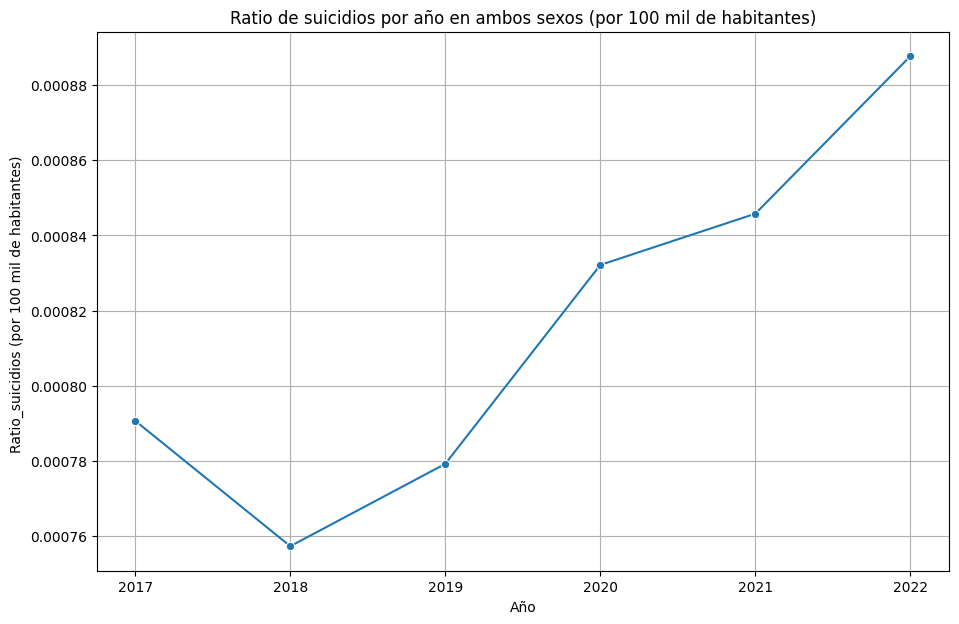

C:\Users\teres\AppData\Local\Temp\ipykernel_11080\2992300145.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=suicidios_ambos_sexos, x='Año', y='Ratio_suicidios', palette='viridis')


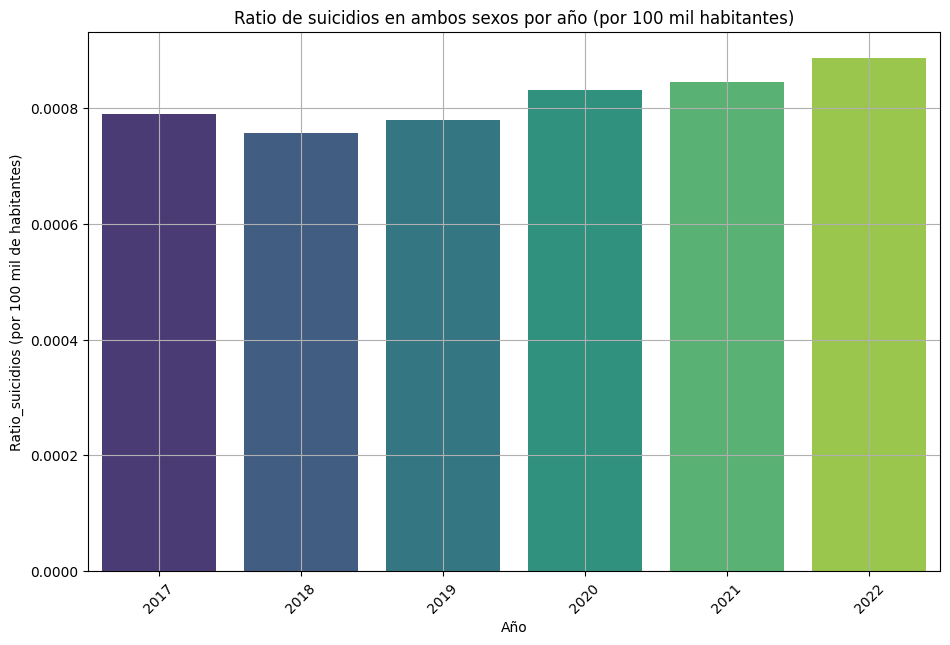

In [ ]:
plt.figure(figsize = (11, 7))
sns.lineplot(data = suicidios_ambos_sexos, x ='Año', y ='Ratio_suicidios', marker = 'o')
plt.title('Ratio de suicidios por año en ambos sexos (por 100 mil de habitantes)')
plt.xlabel('Año')
plt.ylabel('Ratio_suicidios (por 100 mil de habitantes) ')
plt.grid(True)
plt.show()

# Gráfico de barras
plt.figure(figsize=(11, 7))
sns.barplot(data=suicidios_ambos_sexos, x='Año', y='Ratio_suicidios', palette='viridis')
plt.title('Ratio de suicidios en ambos sexos por año (por 100 mil habitantes)')
plt.xlabel('Año')
plt.ylabel('Ratio_suicidios (por 100 mil de habitantes)')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

In [ ]:
Todas_edades = merged_suicidios[merged_suicidios["Edad"]=="Todas las edades"]
suicidios_mujeres=Todas_edades[Todas_edades["Sexo"]=="Mujeres"]
suicidios_mujeres

,Año,Periodo,Evolución de la población residente en España,Causa de muerte,Sexo,Edad,Total
44,2017,Semestre 2,46.529999,098 Suicidio y lesiones autoinfligidas,Mujeres,Todas las edades,961
110,2018,Semestre 2,46.730000,098 Suicidio y lesiones autoinfligidas,Mujeres,Todas las edades,920
176,2019,Semestre 2,47.110001,098 Suicidio y lesiones autoinfligidas,Mujeres,Todas las edades,900
242,2020,Semestre 2,47.360001,098 Suicidio y lesiones autoinfligidas,Mujeres,Todas las edades,1011
308,2021,Semestre 2,47.330002,098 Suicidio y lesiones autoinfligidas,Mujeres,Todas las edades,1021
374,2022,Semestre 2,47.619999,098 Suicidio y lesiones autoinfligidas,Mujeres,Todas las edades,1101


In [ ]:
suicidios_mujeres["Evolución de la población residente en España"] = pd.to_numeric( arg = suicidios_mujeres["Evolución de la población residente en España"],downcast="float")
suicidios_mujeres['Evolución de la población residente en España'].dtype

C:\Users\teres\AppData\Local\Temp\ipykernel_11080\3977900348.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  suicidios_mujeres["Evolución de la población residente en España"] = pd.to_numeric( arg = suicidios_mujeres["Evolución de la población residente en España"],downcast="float")


dtype('float32')

In [ ]:
suicidios_mujeres["Total"]= suicidios_mujeres["Total"].astype("str").apply(lambda x: x.replace('.',''))
suicidios_mujeres["Total"] = suicidios_mujeres["Total"].astype("int")
suicidios_mujeres["Total"]

C:\Users\teres\AppData\Local\Temp\ipykernel_11080\283302745.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  suicidios_mujeres["Total"]= suicidios_mujeres["Total"].astype("str").apply(lambda x: x.replace('.',''))
C:\Users\teres\AppData\Local\Temp\ipykernel_11080\283302745.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  suicidios_mujeres["Total"] = suicidios_mujeres["Total"].astype("int")


44      961
110     920
176     900
242    1011
308    1021
374    1101
Name: Total, dtype: int32

In [ ]:
suicidios_mujeres["Ratio_suicidios"] = suicidios_mujeres['Total'] / (suicidios_mujeres['Evolución de la población residente en España'] * 100000).round(2)

C:\Users\teres\AppData\Local\Temp\ipykernel_11080\3481748194.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  suicidios_mujeres["Ratio_suicidios"] = suicidios_mujeres['Total'] / (suicidios_mujeres['Evolución de la población residente en España'] * 100000).round(2)


In [ ]:
suicidios_mujeres

,Año,Periodo,Evolución de la población residente en España,Causa de muerte,Sexo,Edad,Total,Ratio_suicidios
44,2017,Semestre 2,46.529999,098 Suicidio y lesiones autoinfligidas,Mujeres,Todas las edades,961,0.000207
110,2018,Semestre 2,46.730000,098 Suicidio y lesiones autoinfligidas,Mujeres,Todas las edades,920,0.000197
176,2019,Semestre 2,47.110001,098 Suicidio y lesiones autoinfligidas,Mujeres,Todas las edades,900,0.000191
242,2020,Semestre 2,47.360001,098 Suicidio y lesiones autoinfligidas,Mujeres,Todas las edades,1011,0.000213
308,2021,Semestre 2,47.330002,098 Suicidio y lesiones autoinfligidas,Mujeres,Todas las edades,1021,0.000216
374,2022,Semestre 2,47.619999,098 Suicidio y lesiones autoinfligidas,Mujeres,Todas las edades,1101,0.000231


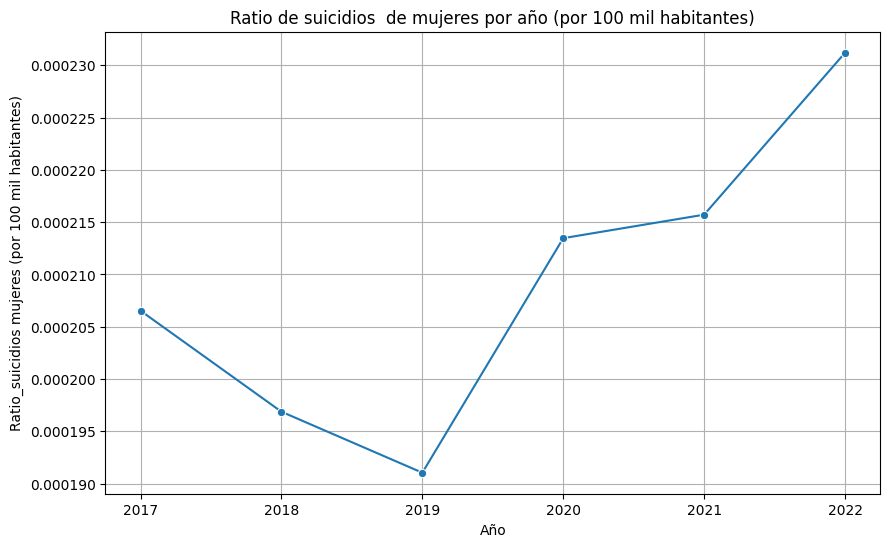

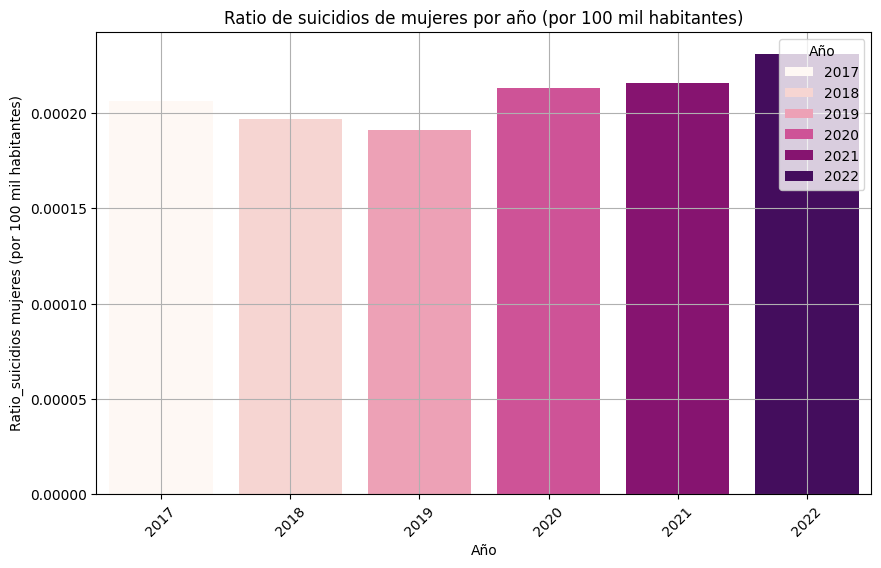

In [ ]:
plt.figure(figsize = (10, 6))
sns.lineplot(data = suicidios_mujeres, x ='Año', y ='Ratio_suicidios', marker = 'o')
plt.title('Ratio de suicidios  de mujeres por año (por 100 mil habitantes)')
plt.xlabel('Año')
plt.ylabel('Ratio_suicidios mujeres (por 100 mil habitantes)')
plt.grid(True)
plt.show()

# Gráfico de barras
plt.figure(figsize=(10, 6))
sns.barplot(data=suicidios_mujeres, x='Año', y='Ratio_suicidios', hue = "Año", palette="RdPu")
plt.title('Ratio de suicidios de mujeres por año (por 100 mil habitantes)')
plt.xlabel('Año')
plt.ylabel('Ratio_suicidios mujeres (por 100 mil habitantes)')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

In [ ]:
Todas_edades = merged_suicidios[merged_suicidios["Edad"]=="Todas las edades"]
suicidios_hombres=Todas_edades[Todas_edades["Sexo"]=="Hombres"]
suicidios_hombres["Evolución de la población residente en España"] = pd.to_numeric( arg = suicidios_hombres["Evolución de la población residente en España"],downcast="float")
suicidios_hombres['Evolución de la población residente en España'].dtype
suicidios_hombres["Total"]=suicidios_hombres["Total"].astype("int")
suicidios_hombres["Ratio_suicidios"] = suicidios_hombres['Total'] / (suicidios_hombres['Evolución de la población residente en España'] * 100000).round(2)

C:\Users\teres\AppData\Local\Temp\ipykernel_11080\3056147227.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  suicidios_hombres["Evolución de la población residente en España"] = pd.to_numeric( arg = suicidios_hombres["Evolución de la población residente en España"],downcast="float")
C:\Users\teres\AppData\Local\Temp\ipykernel_11080\3056147227.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  suicidios_hombres["Total"]=suicidios_hombres["Total"].astype("int")
C:\Users\teres\AppData\Local\Temp\ipykernel

In [ ]:
suicidios_hombres

,Año,Periodo,Evolución de la población residente en España,Causa de muerte,Sexo,Edad,Total,Ratio_suicidios
22,2017,Semestre 2,46.529999,098 Suicidio y lesiones autoinfligidas,Hombres,Todas las edades,2718,0.000584
88,2018,Semestre 2,46.730000,098 Suicidio y lesiones autoinfligidas,Hombres,Todas las edades,2619,0.000560
154,2019,Semestre 2,47.110001,098 Suicidio y lesiones autoinfligidas,Hombres,Todas las edades,2771,0.000588
220,2020,Semestre 2,47.360001,098 Suicidio y lesiones autoinfligidas,Hombres,Todas las edades,293,0.000062
286,2021,Semestre 2,47.330002,098 Suicidio y lesiones autoinfligidas,Hombres,Todas las edades,2982,0.000630
352,2022,Semestre 2,47.619999,098 Suicidio y lesiones autoinfligidas,Hombres,Todas las edades,3126,0.000656
